In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

import tensorflow as tf

/Users/leiming/anaconda2/envs/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [3]:
from IPython.display import Image

### a basic Deep Neural Nets struture

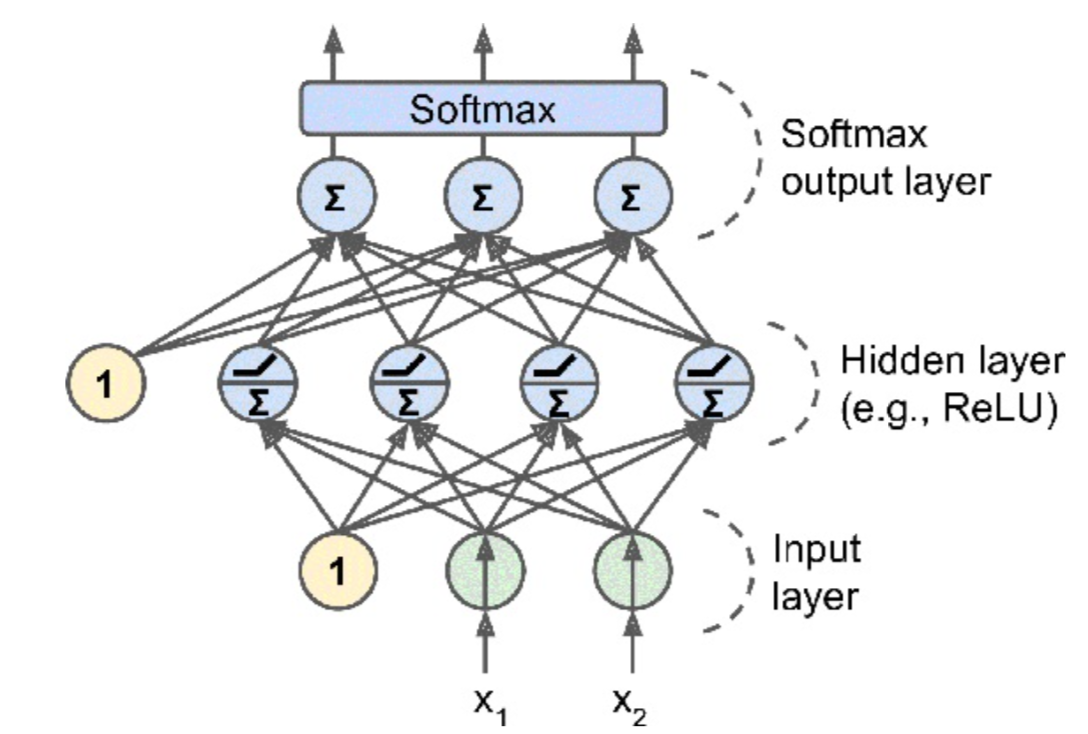

In [4]:
Image(filename='figs/genetic_DNNstructAM.png', width=500, height=500)

##### softmax

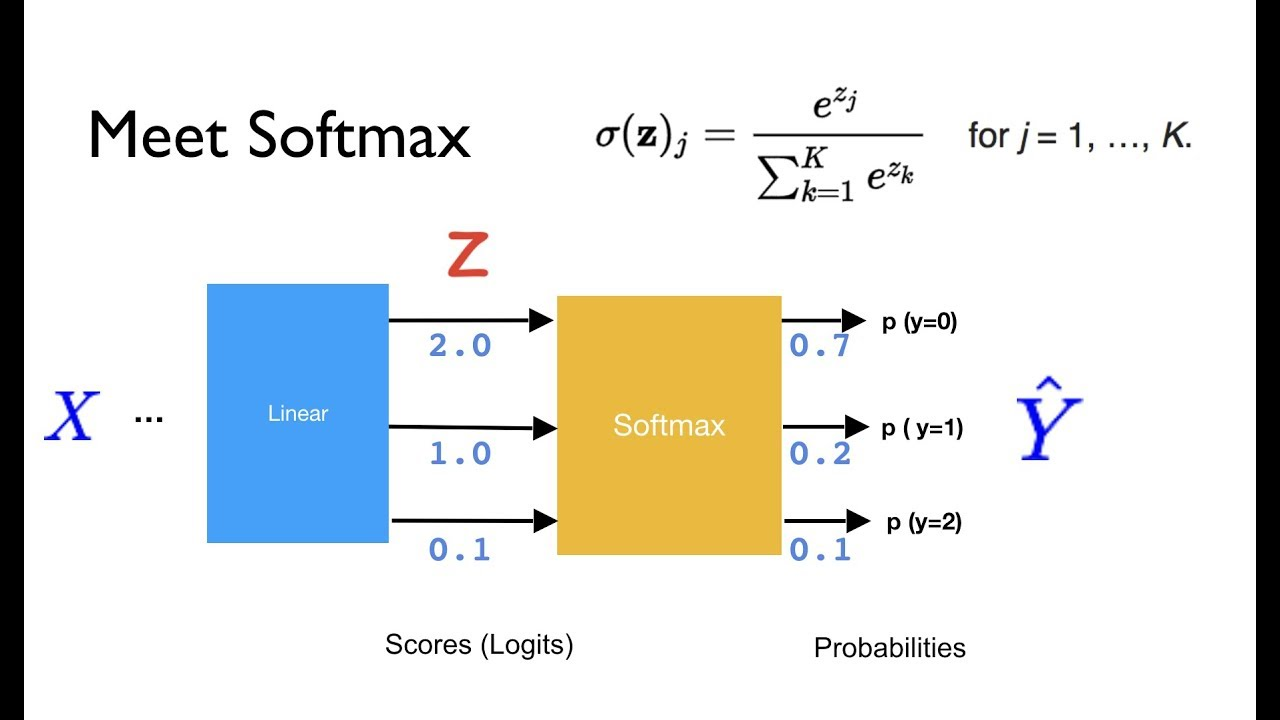

In [5]:
Image(filename='figs/softmax.jpg',width=500, height=500)

picture from https://www.youtube.com/watch?v=lvNdl7yg4Pg

##### gradient descent

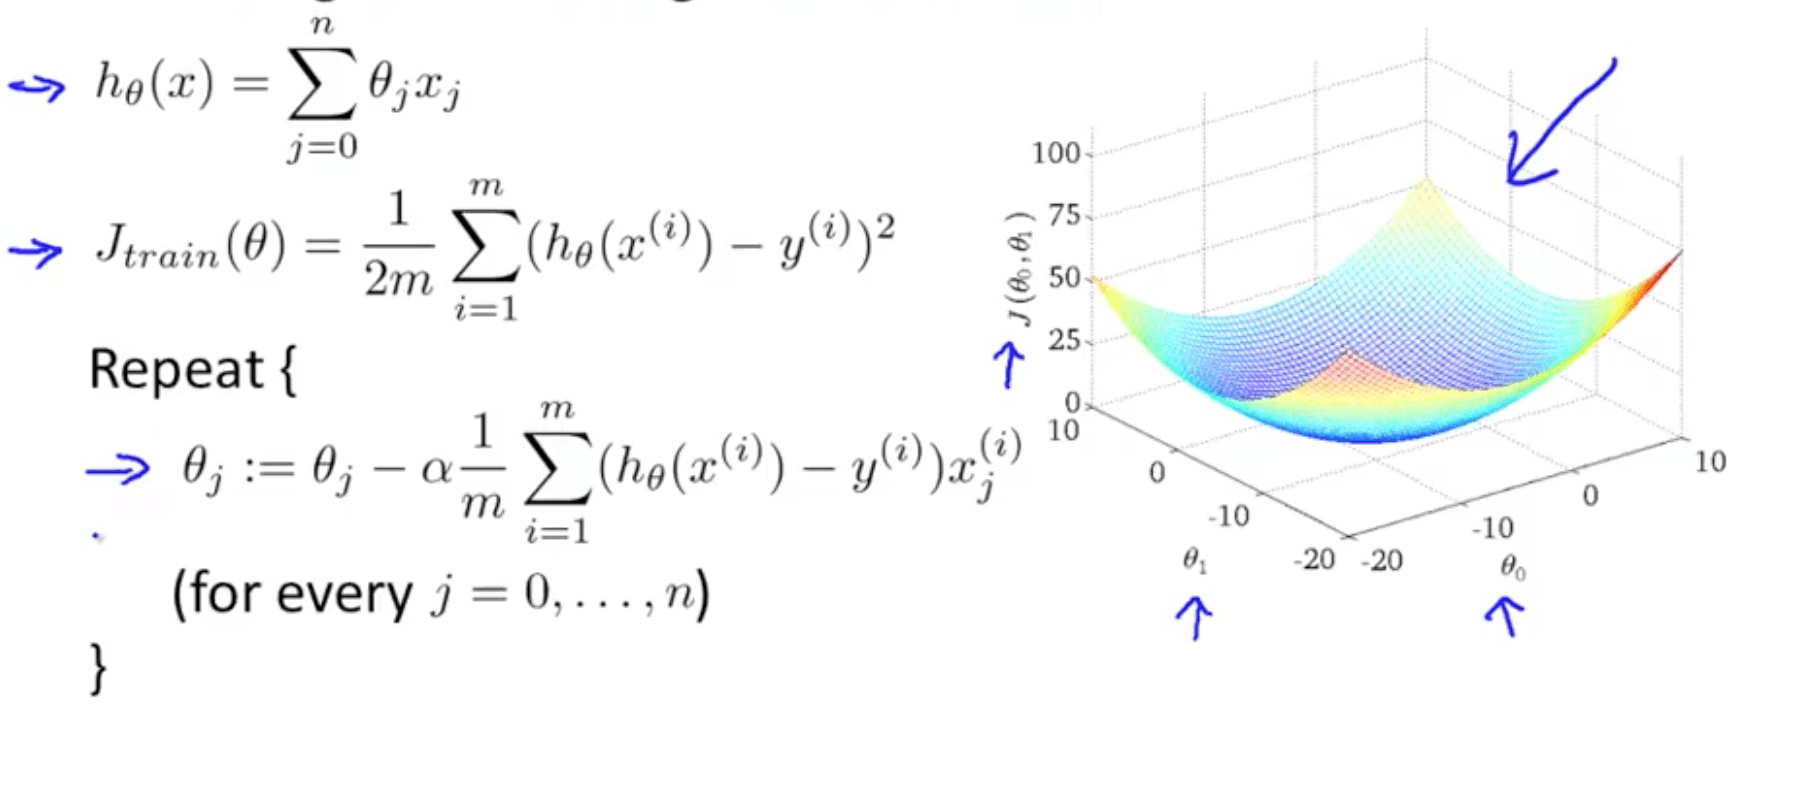

In [6]:
Image(filename='figs/gradient_descent.png', width=500, height=500)

image from https://raw.githubusercontent.com/ritchieng/machine-learning-stanford/master/w10_large_scale_ml/largescaleml2.png

### build a simple NN for  MNIST dataset

load the mnist dataset

In [7]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0

y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [8]:
print(X_train.shape) # training
print(X_valid.shape)  # valid
print(X_test.shape) # testing

(55000, 784)
(5000, 784)
(10000, 784)


tf.layers.dense()
 * almost identical to the fully_connected() function

tf.name_scope
* avoid variable conflicts
* reuse variables

In [9]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_outputs = 10

In [10]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")   # "None" is for batch size
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [11]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    logits = tf.layers.dense(hidden1, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

In [12]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [13]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [14]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [15]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [17]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [19]:
n_epochs = 20
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.88 Validation accuracy: 0.8942
1 Batch accuracy: 0.92 Validation accuracy: 0.9088
2 Batch accuracy: 0.94 Validation accuracy: 0.9202
3 Batch accuracy: 0.88 Validation accuracy: 0.928
4 Batch accuracy: 0.94 Validation accuracy: 0.9322
5 Batch accuracy: 0.94 Validation accuracy: 0.9366
6 Batch accuracy: 1.0 Validation accuracy: 0.9402
7 Batch accuracy: 0.94 Validation accuracy: 0.9428
8 Batch accuracy: 0.94 Validation accuracy: 0.945
9 Batch accuracy: 0.9 Validation accuracy: 0.9476
10 Batch accuracy: 0.88 Validation accuracy: 0.9496
11 Batch accuracy: 0.96 Validation accuracy: 0.9522
12 Batch accuracy: 0.96 Validation accuracy: 0.9522
13 Batch accuracy: 0.96 Validation accuracy: 0.9554
14 Batch accuracy: 1.0 Validation accuracy: 0.9578
15 Batch accuracy: 0.9 Validation accuracy: 0.9572
16 Batch accuracy: 0.98 Validation accuracy: 0.9592
17 Batch accuracy: 1.0 Validation accuracy: 0.9598
18 Batch accuracy: 0.96 Validation accuracy: 0.9628
19 Batch accuracy: 0.94 Valid

### fine-tuning the hyperparameters

* num. of hidden layers
* num. of neurons per hidden layers
* different activation functions (logistic/sigmoid, relu,leaky_relu, etc.)
* network topology

### references

[1] https://github.com/ageron/handson-ml/